In [1]:
%matplotlib inline

import numpy as np
from numpy import linalg as nla
import scipy as sp
from scipy import linalg as sla
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from time import time
import SHFunctions as shf
import os

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
np.set_printoptions(linewidth = 200)

In [2]:
A = shf.MakeGenSingA(3, 2, delta = .00010)
A

array([[[ 0.00000000e+00,  1.67535645e-01,  1.65764355e-01],
        [ 2.22281303e-01,  0.00000000e+00,  1.11018697e-01],
        [ 1.82052009e-01,  1.51247991e-01,  0.00000000e+00]],

       [[-1.00000000e+00,  1.52858618e-01,  1.80441382e-01],
        [ 2.11423396e-01, -1.00000000e+00,  1.21876604e-01],
        [ 1.79858872e-01,  1.53441128e-01, -1.00000000e+00]],

       [[ 1.00000000e-04,  2.43002596e-01,  9.02974041e-02],
        [ 1.34512177e-01,  1.00000000e-04,  1.98787823e-01],
        [ 1.36559793e-01,  1.96740207e-01,  1.00000000e-04]]])

[[0.26776782 0.38171228 0.35021997]
 [0.45749498 0.23276773 0.30943735]
 [0.42537971 0.36661097 0.20770938]]


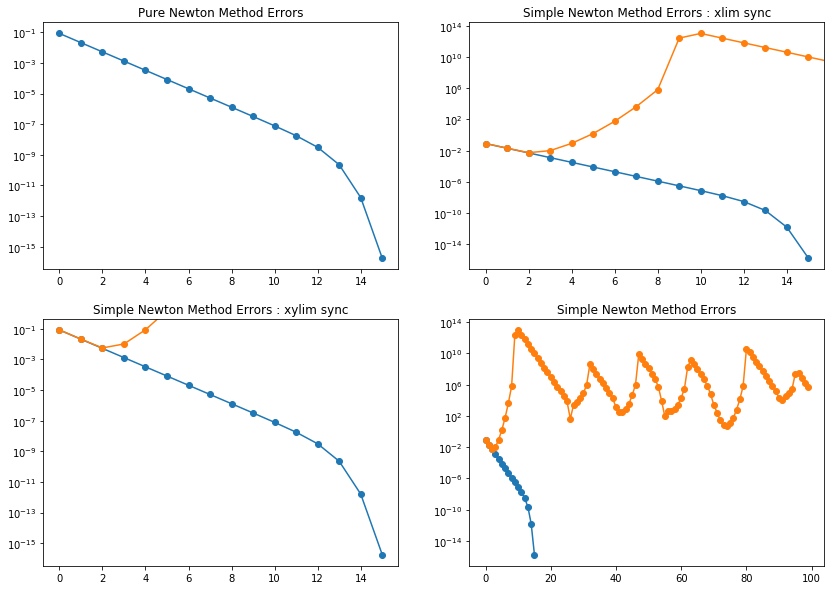

In [3]:
Ss = shf.NewtonPoly(A)
ss = shf.SimpNewtonPoly(A)
# Ss = shf.NewtonPoly(A, X0 = np.array([[0, 1, 0],[0, 0, 1],[0, 0, 0]]))
# Ss = shf.NewtonPoly(A, X0 = 1 * np.eye(3))
fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.semilogy(Ss['errs'],'-o')
ax1.set_title('Pure Newton Method Errors')

ax2.semilogy(Ss['errs'],'-o')
ax2.semilogy(ss['errs'],'-o')
ax2.set_xlim(ax1.get_xlim())
ax2.set_title('Simple Newton Method Errors : xlim sync')

ax3.semilogy(Ss['errs'],'-o')
ax3.semilogy(ss['errs'],'-o')
ax3.set_xlim(ax1.get_xlim())
ax3.set_ylim(ax1.get_ylim())
ax3.set_title('Simple Newton Method Errors : xylim sync')

ax4.semilogy(Ss['errs'],'-o')
ax4.semilogy(ss['errs'],'-o')
ax4.set_title('Simple Newton Method Errors')

print(Ss['sol'])

In [4]:
# Derivative에 대한 eigenvalues와 vectors
Ds = []
EVs = []
for i in range(len(Ss['P_Xs'])):
    d, ev = nla.eig(Ss['P_Xs'][i])
    Ds.append(d)
    EVs.append(ev)

# for i in range(len(Ds)):
#     print(Ds[i])
#     print(EVs[i])

In [5]:
coeffi = np.zeros((Ss['Hs'][i].shape[0] * Ss['Hs'][i].shape[1],len(EVs)))
coeffi = coeffi.astype(complex)
for i in range(len(EVs)):
    h = nla.solve(EVs[i], np.reshape(Ss['Hs'][i], (Ss['Hs'][i].shape[0] * Ss['Hs'][i].shape[1],1), order='F'))
    coeffi[:,i] = np.squeeze(h)
# coeffi.transpose()

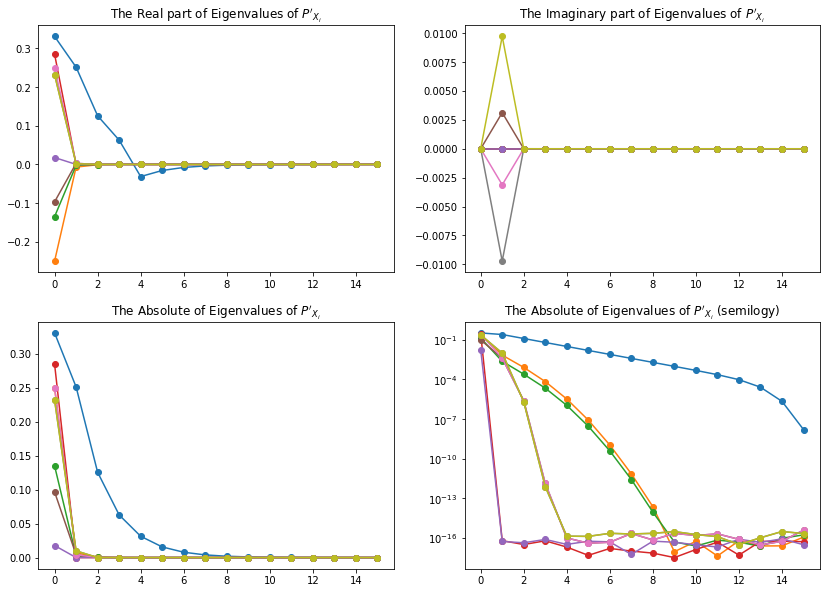

In [6]:
fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(221)
ax1.set_title("The Real part of Eigenvalues of $P'_{X_{i}}$")

ax2 = fig.add_subplot(222)
ax2.set_title("The Imaginary part of Eigenvalues of $P'_{X_{i}}$")

ax3 = fig.add_subplot(223)
ax3.set_title("The Absolute of Eigenvalues of $P'_{X_{i}}$")

ax4 = fig.add_subplot(224)
ax4.set_title("The Absolute of Eigenvalues of $P'_{X_{i}}$ (semilogy)")

for i in range(coeffi.shape[0]):
    ax1.plot(np.real(coeffi[i,:]),'-o')
    ax2.plot(np.imag(coeffi[i,:]),'-o')
    ax3.plot(np.abs(coeffi[i,:]),'-o')
    ax4.semilogy(np.abs(coeffi[i,:]),'-o')

In [7]:
# X_{i}에 대한 eigenvalues와 vectors
Ds = []
EVs = []
for i in range(len(Ss['Xs'])):
    d, ev = nla.eig(Ss['Xs'][i])
    Ds.append(d)
    EVs.append(ev)

for i in range(len(Ds)):
    print(Ds[i])
    print(EVs[i])

[0. 0. 0.]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[ 0.499925   -0.16628039 -0.11878265]
[[-0.57735027 -0.68232402  0.1181017 ]
 [-0.57735027  0.72725377 -0.73696074]
 [-0.57735027  0.07440357  0.66553801]]
[ 0.74988749 -0.17074859 -0.12070262]
[[-0.57735027 -0.68516513  0.10307916]
 [-0.57735027  0.72511701 -0.7275758 ]
 [-0.57735027  0.06894977  0.678239  ]]
[ 0.87486872 -0.17075195 -0.12070318]
[[-0.57735027 -0.68556623  0.10317906]
 [-0.57735027  0.72477338 -0.72743944]
 [-0.57735027  0.06857477  0.67837006]]
[ 0.93735928 -0.17075195 -0.12070318]
[[-0.57735027 -0.68559846  0.103189  ]
 [-0.57735027  0.7247457  -0.72742905]
 [-0.57735027  0.06854497  0.67837969]]
[ 0.96860448 -0.17075195 -0.12070318]
[[-0.57735027 -0.68559996  0.10318948]
 [-0.57735027  0.72474442 -0.72742855]
 [-0.57735027  0.06854359  0.67838016]]
[ 0.98422689 -0.17075195 -0.12070318]
[[-0.57735027 -0.6856      0.10318949]
 [-0.57735027  0.72474439 -0.72742854]
 [-0.57735027  0.06854355  0.67838017]]
[ 0.99203774 -0.

In [8]:
for i in range(len(EVs)-1):
    Pre, Nex = EVs[i], EVs[i+1]
    for j in range(Pre.shape[1]):
        if np.sign(np.real(Pre[0,j])) != np.sign(np.real(Nex[0,j])):
            Nex[:,j] = -Nex[:,j]
    print(nla.norm(Pre - Nex, 'fro'))

2.762405297427667
0.02274754456350095
0.0006821581713377047
5.46997426987572e-05
2.553855622545521e-06
6.398768027961715e-08
8.298939461181378e-10
5.4754884980568995e-12
1.8260010125216287e-14
1.96673274755553e-15
2.3815674851283155e-15
1.5553651028439615e-15
8.474545865484476e-16
6.516652152274091e-16
2.038476501706581e-15
2.032515616350984e-15


In [9]:
B = np.zeros(A.shape)
B = B.astype(np.complex128)
for i in range(A.shape[0]):
    B[i,:,:] = np.dot(A[i,:,:], EVs[-1])
if np.sum(np.iscomplex(B)) == 0:
    B = B.astype(np.float64)
B

c:\users\saibi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  


array([[[ 0.19243084, -0.1327826 ,  0.00941896],
        [ 0.19243084,  0.14478645, -0.09824998],
        [ 0.19243084,  0.01519872,  0.09123625]],

       [[-0.38491942, -0.80875152,  0.09197535],
        [-0.38491942,  0.86134241, -0.83192388],
        [-0.38491942,  0.0806492 ,  0.77143808]],

       [[ 0.19248858, -0.18223551,  0.11550074],
        [ 0.19248858,  0.07852345, -0.14866122],
        [ 0.19248858, -0.04896782,  0.12895507]]])

In [10]:
BSs = shf.NewtonPoly(B)

In [11]:
d, v = nla.eig(BSs['sol'])
BSs['sol'][abs(BSs['sol']) < 1e-15] = 0
d[abs(d) < 1e-15] = 0
v[abs(v) < 1e-15] = 0
print(BSs['sol'])
print(d)
print(v)

[[ 0.99970006  0.          0.        ]
 [ 0.         -0.17075195  0.        ]
 [ 0.          0.         -0.12070318]]
[ 0.99970006 -0.17075195 -0.12070318]
[[-1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.00000000e+00 -2.56440306e-15]
 [ 0.00000000e+00  0.00000000e+00 -1.00000000e+00]]


In [13]:
# Commutative 검증
for i in range(len(Ss['Xs'])-1):
    print(nla.norm(Ss['Xs'][i] @ Ss['Xs'][i+1] - Ss['Xs'][i+1] @ Ss['Xs'][i]))

0.0
0.00378600982931599
0.0006564814846896343
6.30762817802959e-05
3.1832417261250325e-06
8.24041491090952e-08
1.0806160889305406e-09
7.132414628522935e-12
2.3687460981834055e-14
1.4686870114880517e-16
1.3597399555105182e-16
1.1102230246251565e-16
1.8410966031475738e-16
9.614813431917819e-17
1.2412670766236366e-16
2.220446049250313e-16
